## import necessary packages and read in files 

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np
import re

In [2]:
#census = pd.read_csv('../data/demographic_census.csv')
voting_turnout = pd.read_csv('../data/2018-turnout-population-congress-districts.csv', nrows = 436)
voting_age = pd.read_csv('../data/2018-age-population-congress-districts.csv', nrows = 436)
voting_ed = pd.read_csv('../data/2018-education-population-congress-districts.csv', nrows = 436)
voting_sex_poverty = pd.read_csv('../data/2018-sex-poverty-population-congress-districts.csv', nrows = 436)
voting_race = pd.read_csv('../data/2018-race-population-congress-districts.csv', nrows = 436)

## Remove excess columns. Create new column that combines State Abbreviation and Congressional District, named District (for easier merges later). Convert object columns to either int64 or float datatypes. 

## Voter Turnout data clean up. 

## Remove dud columns, create district column. Correct spacing issues inside column names and move new district column to first index. 

In [3]:
voting_turnout.head()

,Line #,State abbreviation,State name,Congressional district,"Votes cast for congressional representative for the November 6, 2018 election1",Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Voting Rate Estimate,Voting Rate Margin of error (MOE),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,AL,Alabama,1,"242,617","544,464","3,424",44.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"226,230","516,295","5,674",43.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"231,915","543,854","4,099",42.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"230,969","515,701","4,678",44.8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"260,673","551,968","2,121",47.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
voting_turnout = voting_turnout.drop(columns = ['Line #', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
                                              'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'])

In [5]:
voting_turnout['District'] = voting_turnout['State abbreviation'] + "-" + voting_turnout['Congressional district']

In [6]:
voting_turnout.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       'Votes cast for congressional representative for the November 6, 2018 election1',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' Voting Rate Estimate ', ' Voting Rate Margin of error (MOE) ',
       'District'],
      dtype='object')

In [7]:
voting_turnout = voting_turnout[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Votes cast for congressional representative for the November 6, 2018 election1',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' Voting Rate Estimate ', ' Voting Rate Margin of error (MOE) ']]

In [8]:
voting_turnout.columns = ['District', 'State abbreviation', 'State name', 'Congressional district',
       'Votes cast for congressional reps for the Nov 2018 election',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'Voting Rate Estimate', 'Voting Rate MOE']

In [9]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
0,AL-1,AL,Alabama,1,"242,617","544,464","3,424",44.6,0.3
1,AL-2,AL,Alabama,2,"226,230","516,295","5,674",43.8,0.5
2,AL-3,AL,Alabama,3,"231,915","543,854","4,099",42.6,0.3
3,AL-4,AL,Alabama,4,"230,969","515,701","4,678",44.8,0.4
4,AL-5,AL,Alabama,5,"260,673","551,968","2,121",47.2,0.2


## check column datatypes. Make sure that numeric columns are either integer or float datatypes. 

In [10]:
voting_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   District                                                     436 non-null    object
 1   State abbreviation                                           436 non-null    object
 2   State name                                                   436 non-null    object
 3   Congressional district                                       436 non-null    object
 4   Votes cast for congressional reps for the Nov 2018 election  436 non-null    object
 5   Citizen voting-age population Estimate                       436 non-null    object
 6   Citizen voting-age population MOE                            436 non-null    object
 7   Voting Rate Estimate                                         436 non-null    object
 8   V

In [11]:
voting_turnout.tail()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
431,WI-5,WI,Wisconsin,5,"364,288","558,805","5,239",65.2,0.6
432,WI-6,WI,Wisconsin,6,"325,065","556,485","2,532",58.4,0.3
433,WI-7,WI,Wisconsin,7,"322,840","552,651","2,556",58.4,0.3
434,WI-8,WI,Wisconsin,8,"328,774","556,205","2,262",59.1,0.2
435,WY-At-large,WY,Wyoming,At-large,"205,275","433,644","2,221",47.3,0.2


In [12]:
voting_turnout.shape

(436, 9)

In [13]:
type(voting_turnout)

pandas.core.frame.DataFrame

## check for dashes in columns. Create for loop function to replace dashes in order for dtype conversion to run. 

In [14]:
dash = voting_turnout[voting_turnout['Votes cast for congressional reps for the Nov 2018 election'] == ' -   ']
dash

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
97,FL-10,FL,Florida,10,-,"546,157","12,769",-,-
101,FL-14,FL,Florida,14,-,"534,225","9,792",-,-
108,FL-21,FL,Florida,21,-,"546,101","11,927",-,-
111,FL-24,FL,Florida,24,-,"477,697","12,311",-,-
293,NC-9,NC,North Carolina,9,-,"561,804","6,951",-,-


In [15]:
no_dash = ['Votes cast for congressional reps for the Nov 2018 election',
       'Voting Rate Estimate', 'Voting Rate MOE']

In [16]:
for column in no_dash:
    voting_turnout[column] = voting_turnout[column].str.replace(' -   ', '0')

In [17]:
voting_turnout.iloc[98:113, :]

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
98,FL-11,FL,Florida,11,"367,506","652,135","10,786",56.4,0.9
99,FL-12,FL,Florida,12,"334,918","605,983","7,435",55.3,0.7
100,FL-13,FL,Florida,13,"316,971","584,889","8,338",54.2,0.8
101,FL-14,FL,Florida,14,0,"534,225","9,792",0,0
102,FL-15,FL,Florida,15,"285,532","578,715","14,070",49.3,1.2
103,FL-16,FL,Florida,16,"361,946","638,769","8,875",56.7,0.8
104,FL-17,FL,Florida,17,"310,520","615,104","10,351",50.5,0.8
105,FL-18,FL,Florida,18,"342,359","599,873","10,324",57.1,1.0
106,FL-19,FL,Florida,19,"339,607","631,233","11,072",53.8,0.9
107,FL-20,FL,Florida,20,"202,824","507,613","13,423",40.0,1.1


In [18]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
0,AL-1,AL,Alabama,1,"242,617","544,464","3,424",44.6,0.3
1,AL-2,AL,Alabama,2,"226,230","516,295","5,674",43.8,0.5
2,AL-3,AL,Alabama,3,"231,915","543,854","4,099",42.6,0.3
3,AL-4,AL,Alabama,4,"230,969","515,701","4,678",44.8,0.4
4,AL-5,AL,Alabama,5,"260,673","551,968","2,121",47.2,0.2


## create for loop function to remove commas out of the columns that will need to converted into integers. 

In [19]:
no_comma = ['Votes cast for congressional reps for the Nov 2018 election',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE']

In [20]:
for column in no_comma:
    voting_turnout[column] = voting_turnout[column].str.replace(',', '')

In [21]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
0,AL-1,AL,Alabama,1,242617,544464,3424,44.6,0.3
1,AL-2,AL,Alabama,2,226230,516295,5674,43.8,0.5
2,AL-3,AL,Alabama,3,231915,543854,4099,42.6,0.3
3,AL-4,AL,Alabama,4,230969,515701,4678,44.8,0.4
4,AL-5,AL,Alabama,5,260673,551968,2121,47.2,0.2


## create dictionary with columns as key and the desired datatype as value. Use this dictionary for a for loop for to convert the datatypes of voter_turnout df. 

In [22]:
convert_dict = {'Votes cast for congressional reps for the Nov 2018 election': int,
       'Citizen voting-age population Estimate': int,
       'Citizen voting-age population MOE': int,
       'Voting Rate Estimate': float, 'Voting Rate MOE': float}

In [23]:
for key, value in convert_dict.items(): 
    voting_turnout[key] = voting_turnout[key].astype(value)

In [24]:
voting_turnout.head()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
0,AL-1,AL,Alabama,1,242617,544464,3424,44.6,0.3
1,AL-2,AL,Alabama,2,226230,516295,5674,43.8,0.5
2,AL-3,AL,Alabama,3,231915,543854,4099,42.6,0.3
3,AL-4,AL,Alabama,4,230969,515701,4678,44.8,0.4
4,AL-5,AL,Alabama,5,260673,551968,2121,47.2,0.2


In [25]:
voting_turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   District                                                     436 non-null    object 
 1   State abbreviation                                           436 non-null    object 
 2   State name                                                   436 non-null    object 
 3   Congressional district                                       436 non-null    object 
 4   Votes cast for congressional reps for the Nov 2018 election  436 non-null    int32  
 5   Citizen voting-age population Estimate                       436 non-null    int32  
 6   Citizen voting-age population MOE                            436 non-null    int32  
 7   Voting Rate Estimate                                         436 non-null    floa

In [26]:
voting_turnout.tail()

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE
431,WI-5,WI,Wisconsin,5,364288,558805,5239,65.2,0.6
432,WI-6,WI,Wisconsin,6,325065,556485,2532,58.4,0.3
433,WI-7,WI,Wisconsin,7,322840,552651,2556,58.4,0.3
434,WI-8,WI,Wisconsin,8,328774,556205,2262,59.1,0.2
435,WY-At-large,WY,Wyoming,At-large,205275,433644,2221,47.3,0.2


## Voters by Age data clean up. 

In [27]:
voting_age.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),18-29 Age Estimate,18-29 Age Margin of error (MOE),Age 18-29 Percent of total,18-29 Age Percent of total margin of error (MOE),...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,1,AL,Alabama,1,"544,464","3,424","104,060","2,412",19.1,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"516,295","5,674","109,222","2,918",21.2,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"543,854","4,099","121,328","2,379",22.3,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"515,701","4,678","95,990","2,777",18.6,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"551,968","2,121","109,986","1,624",19.9,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
voting_age.columns

Index(['Line #', 'State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' 18-29 Age Estimate ', ' 18-29 Age  Margin of error (MOE) ',
       ' Age 18-29 Percent of total ',
       ' 18-29 Age Percent of total margin of error (MOE) ',
       ' 30-44 Age Estimate ', ' 30-44 Age Margin of error (MOE) ',
       ' 30-44 Age Percent of total ',
       ' 30-44 Age Percent of total margin of error (MOE) ',
       ' 45-64 Age Estimate ', ' 45-64 Age Margin of error (MOE) ',
       ' 45-64 Age Percent of total ',
       ' 45-64 Age Percent of total margin of error (MOE) ',
       ' 65+ Age Estimate ', ' 65+ Age Margin of error (MOE) ',
       ' 65+ Age Percent of total ',
       ' 65+ Age Percent of total margin of error (MOE) ', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unname

In [29]:
voting_age = voting_age[['State abbreviation',
                                 'State name',
                                 'Congressional district',
                                 ' Citizen voting-age population Estimate ',
                                 ' Citizen voting-age population Margin of error (MOE) ',
                                 ' 18-29 Age Estimate ',
                                 ' 18-29 Age  Margin of error (MOE) ',
                                 ' Age 18-29 Percent of total ',
                                 ' 18-29 Age Percent of total margin of error (MOE) ',
                                 ' 30-44 Age Estimate ',
                                 ' 30-44 Age Margin of error (MOE) ',
                                 ' 30-44 Age Percent of total ',
                                 ' 30-44 Age Percent of total margin of error (MOE) ',
                                 ' 45-64 Age Estimate ',
                                 ' 45-64 Age Margin of error (MOE) ',
                                 ' 45-64 Age Percent of total ',
                                 ' 45-64 Age Percent of total margin of error (MOE) ',
                                 ' 65+ Age Estimate ',
                                 ' 65+ Age Margin of error (MOE) ',
                                 ' 65+ Age Percent of total ',
                                 ' 65+ Age Percent of total margin of error (MOE) ']]

In [30]:
voting_age['District'] = voting_age['State abbreviation'] + "-" + voting_age['Congressional district']

In [31]:
voting_age.head()

,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),18-29 Age Estimate,18-29 Age Margin of error (MOE),Age 18-29 Percent of total,18-29 Age Percent of total margin of error (MOE),30-44 Age Estimate,...,30-44 Age Percent of total margin of error (MOE),45-64 Age Estimate,45-64 Age Margin of error (MOE),45-64 Age Percent of total,45-64 Age Percent of total margin of error (MOE),65+ Age Estimate,65+ Age Margin of error (MOE),65+ Age Percent of total,65+ Age Percent of total margin of error (MOE),District
0,AL,Alabama,1,"544,464","3,424","104,060","2,412",19.1,0.4,"125,900",...,0.5,"188,031","3,186",34.5,0.5,"126,473","1,797",23.2,0.3,AL-1
1,AL,Alabama,2,"516,295","5,674","109,222","2,918",21.2,0.5,"118,999",...,0.5,"173,351","3,069",33.6,0.5,"114,723","2,059",22.2,0.4,AL-2
2,AL,Alabama,3,"543,854","4,099","121,328","2,379",22.3,0.4,"121,212",...,0.6,"182,379","3,899",33.5,0.7,"118,935","1,851",21.9,0.3,AL-3
3,AL,Alabama,4,"515,701","4,678","95,990","2,777",18.6,0.5,"114,921",...,0.5,"177,247","3,022",34.4,0.5,"127,543","2,309",24.7,0.4,AL-4
4,AL,Alabama,5,"551,968","2,121","109,986","1,624",19.9,0.3,"129,788",...,0.3,"193,348","1,995",35.0,0.4,"118,846","1,412",21.5,0.3,AL-5


In [32]:
voting_age.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' 18-29 Age Estimate ', ' 18-29 Age  Margin of error (MOE) ',
       ' Age 18-29 Percent of total ',
       ' 18-29 Age Percent of total margin of error (MOE) ',
       ' 30-44 Age Estimate ', ' 30-44 Age Margin of error (MOE) ',
       ' 30-44 Age Percent of total ',
       ' 30-44 Age Percent of total margin of error (MOE) ',
       ' 45-64 Age Estimate ', ' 45-64 Age Margin of error (MOE) ',
       ' 45-64 Age Percent of total ',
       ' 45-64 Age Percent of total margin of error (MOE) ',
       ' 65+ Age Estimate ', ' 65+ Age Margin of error (MOE) ',
       ' 65+ Age Percent of total ',
       ' 65+ Age Percent of total margin of error (MOE) ', 'District'],
      dtype='object')

In [33]:
voting_age = voting_age[['District', 'State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' 18-29 Age Estimate ', ' 18-29 Age  Margin of error (MOE) ',
       ' Age 18-29 Percent of total ',
       ' 18-29 Age Percent of total margin of error (MOE) ',
       ' 30-44 Age Estimate ', ' 30-44 Age Margin of error (MOE) ',
       ' 30-44 Age Percent of total ',
       ' 30-44 Age Percent of total margin of error (MOE) ',
       ' 45-64 Age Estimate ', ' 45-64 Age Margin of error (MOE) ',
       ' 45-64 Age Percent of total ',
       ' 45-64 Age Percent of total margin of error (MOE) ',
       ' 65+ Age Estimate ', ' 65+ Age Margin of error (MOE) ',
       ' 65+ Age Percent of total ',
       ' 65+ Age Percent of total margin of error (MOE) ']]

In [34]:
voting_age.columns = ['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       '18-29 Age Estimate', '18-29 Age MOE',
       '18-29 Age Percent of total',
       '18-29 Age Percent of total MOE',
       '30-44 Age Estimate', '30-44 Age MOE',
       '30-44 Age Percent of total',
       '30-44 Age Percent of total MOE',
       '45-64 Age Estimate', '45-64 Age MOE',
       '45-64 Age Percent of total',
       '45-64 Age Percent of total MOE',
       '65+ Age Estimate', '65+ Age MOE',
       '65+ Age Percent of total',
       '65+ Age Percent of total MOE']

In [35]:
voting_age.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,18-29 Age Estimate,18-29 Age MOE,18-29 Age Percent of total,18-29 Age Percent of total MOE,...,30-44 Age Percent of total,30-44 Age Percent of total MOE,45-64 Age Estimate,45-64 Age MOE,45-64 Age Percent of total,45-64 Age Percent of total MOE,65+ Age Estimate,65+ Age MOE,65+ Age Percent of total,65+ Age Percent of total MOE
0,AL-1,AL,Alabama,1,"544,464","3,424","104,060","2,412",19.1,0.4,...,23.1,0.5,"188,031","3,186",34.5,0.5,"126,473","1,797",23.2,0.3
1,AL-2,AL,Alabama,2,"516,295","5,674","109,222","2,918",21.2,0.5,...,23.0,0.5,"173,351","3,069",33.6,0.5,"114,723","2,059",22.2,0.4
2,AL-3,AL,Alabama,3,"543,854","4,099","121,328","2,379",22.3,0.4,...,22.3,0.6,"182,379","3,899",33.5,0.7,"118,935","1,851",21.9,0.3
3,AL-4,AL,Alabama,4,"515,701","4,678","95,990","2,777",18.6,0.5,...,22.3,0.5,"177,247","3,022",34.4,0.5,"127,543","2,309",24.7,0.4
4,AL-5,AL,Alabama,5,"551,968","2,121","109,986","1,624",19.9,0.3,...,23.5,0.3,"193,348","1,995",35.0,0.4,"118,846","1,412",21.5,0.3


In [36]:
voting_age.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,18-29 Age Estimate,18-29 Age MOE,18-29 Age Percent of total,18-29 Age Percent of total MOE,...,30-44 Age Percent of total,30-44 Age Percent of total MOE,45-64 Age Estimate,45-64 Age MOE,45-64 Age Percent of total,45-64 Age Percent of total MOE,65+ Age Estimate,65+ Age MOE,65+ Age Percent of total,65+ Age Percent of total MOE
431,WI-5,WI,Wisconsin,5,"558,805","5,239","98,106","2,914",17.6,0.5,...,23.6,0.5,"197,688","3,537",35.4,0.5,"131,160","2,994",23.5,0.5
432,WI-6,WI,Wisconsin,6,"556,485","2,532","102,408","1,665",18.4,0.3,...,22.0,0.4,"200,105","2,042",36.0,0.3,"131,640","1,068",23.7,0.2
433,WI-7,WI,Wisconsin,7,"552,651","2,556","86,048","1,610",15.6,0.3,...,21.0,0.3,"206,377","1,798",37.3,0.3,"144,269","1,494",26.1,0.2
434,WI-8,WI,Wisconsin,8,"556,205","2,262","101,057","1,787",18.2,0.3,...,23.2,0.3,"200,720","1,671",36.1,0.3,"125,516","1,064",22.6,0.2
435,WY-At-large,WY,Wyoming,At-large,"433,644","2,221","86,967","1,666",20.1,0.4,...,24.5,0.4,"144,337","2,205",33.3,0.5,"95,979","1,485",22.1,0.3


In [37]:
voting_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   District                                436 non-null    object 
 1   State abbreviation                      436 non-null    object 
 2   State name                              436 non-null    object 
 3   Congressional district                  436 non-null    object 
 4   Citizen voting-age population Estimate  436 non-null    object 
 5   Citizen voting-age population MOE       436 non-null    object 
 6   18-29 Age Estimate                      436 non-null    object 
 7   18-29 Age MOE                           436 non-null    object 
 8   18-29 Age Percent of total              436 non-null    float64
 9   18-29 Age Percent of total MOE          436 non-null    float64
 10  30-44 Age Estimate                      436 non-null    object

In [38]:
voting_age.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', '18-29 Age Estimate',
       '18-29 Age MOE', '18-29 Age Percent of total',
       '18-29 Age Percent of total MOE', '30-44 Age Estimate', '30-44 Age MOE',
       '30-44 Age Percent of total', '30-44 Age Percent of total MOE',
       '45-64 Age Estimate', '45-64 Age MOE', '45-64 Age Percent of total',
       '45-64 Age Percent of total MOE', '65+ Age Estimate', '65+ Age MOE',
       '65+ Age Percent of total', '65+ Age Percent of total MOE'],
      dtype='object')

In [39]:
dash1 = voting_turnout[voting_turnout['Citizen voting-age population Estimate'] == ' -   ']
dash1

,District,State abbreviation,State name,Congressional district,Votes cast for congressional reps for the Nov 2018 election,Citizen voting-age population Estimate,Citizen voting-age population MOE,Voting Rate Estimate,Voting Rate MOE


In [40]:
no_comma1 = ['Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', '18-29 Age Estimate',
       '18-29 Age MOE', '30-44 Age Estimate', '30-44 Age MOE',
       '45-64 Age Estimate', '45-64 Age MOE', '65+ Age Estimate', '65+ Age MOE']

In [41]:
for column in no_comma1:
    voting_age[column] = voting_age[column].str.replace(',', '')

In [42]:
convert_dict1 = {'Citizen voting-age population Estimate': int,
       'Citizen voting-age population MOE': int, '18-29 Age Estimate': int,
       '18-29 Age MOE': int, '18-29 Age Percent of total': float,
       '18-29 Age Percent of total MOE': float, '30-44 Age Estimate': int, '30-44 Age MOE': int,
       '30-44 Age Percent of total': float, '30-44 Age Percent of total MOE': float,
       '45-64 Age Estimate': int, '45-64 Age MOE': int, '45-64 Age Percent of total': float,
       '45-64 Age Percent of total MOE': float, '65+ Age Estimate': int, '65+ Age MOE': int,
       '65+ Age Percent of total': float, '65+ Age Percent of total MOE': float}

In [43]:
for key, value in convert_dict1.items(): 
    voting_age[key] = voting_age[key].astype(value)

In [44]:
voting_age.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,18-29 Age Estimate,18-29 Age MOE,18-29 Age Percent of total,18-29 Age Percent of total MOE,...,30-44 Age Percent of total,30-44 Age Percent of total MOE,45-64 Age Estimate,45-64 Age MOE,45-64 Age Percent of total,45-64 Age Percent of total MOE,65+ Age Estimate,65+ Age MOE,65+ Age Percent of total,65+ Age Percent of total MOE
0,AL-1,AL,Alabama,1,544464,3424,104060,2412,19.1,0.4,...,23.1,0.5,188031,3186,34.5,0.5,126473,1797,23.2,0.3
1,AL-2,AL,Alabama,2,516295,5674,109222,2918,21.2,0.5,...,23.0,0.5,173351,3069,33.6,0.5,114723,2059,22.2,0.4
2,AL-3,AL,Alabama,3,543854,4099,121328,2379,22.3,0.4,...,22.3,0.6,182379,3899,33.5,0.7,118935,1851,21.9,0.3
3,AL-4,AL,Alabama,4,515701,4678,95990,2777,18.6,0.5,...,22.3,0.5,177247,3022,34.4,0.5,127543,2309,24.7,0.4
4,AL-5,AL,Alabama,5,551968,2121,109986,1624,19.9,0.3,...,23.5,0.3,193348,1995,35.0,0.4,118846,1412,21.5,0.3


In [45]:
voting_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   District                                436 non-null    object 
 1   State abbreviation                      436 non-null    object 
 2   State name                              436 non-null    object 
 3   Congressional district                  436 non-null    object 
 4   Citizen voting-age population Estimate  436 non-null    int32  
 5   Citizen voting-age population MOE       436 non-null    int32  
 6   18-29 Age Estimate                      436 non-null    int32  
 7   18-29 Age MOE                           436 non-null    int32  
 8   18-29 Age Percent of total              436 non-null    float64
 9   18-29 Age Percent of total MOE          436 non-null    float64
 10  30-44 Age Estimate                      436 non-null    int32 

In [46]:
voting_age.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,18-29 Age Estimate,18-29 Age MOE,18-29 Age Percent of total,18-29 Age Percent of total MOE,...,30-44 Age Percent of total,30-44 Age Percent of total MOE,45-64 Age Estimate,45-64 Age MOE,45-64 Age Percent of total,45-64 Age Percent of total MOE,65+ Age Estimate,65+ Age MOE,65+ Age Percent of total,65+ Age Percent of total MOE
431,WI-5,WI,Wisconsin,5,558805,5239,98106,2914,17.6,0.5,...,23.6,0.5,197688,3537,35.4,0.5,131160,2994,23.5,0.5
432,WI-6,WI,Wisconsin,6,556485,2532,102408,1665,18.4,0.3,...,22.0,0.4,200105,2042,36.0,0.3,131640,1068,23.7,0.2
433,WI-7,WI,Wisconsin,7,552651,2556,86048,1610,15.6,0.3,...,21.0,0.3,206377,1798,37.3,0.3,144269,1494,26.1,0.2
434,WI-8,WI,Wisconsin,8,556205,2262,101057,1787,18.2,0.3,...,23.2,0.3,200720,1671,36.1,0.3,125516,1064,22.6,0.2
435,WY-At-large,WY,Wyoming,At-large,433644,2221,86967,1666,20.1,0.4,...,24.5,0.4,144337,2205,33.3,0.5,95979,1485,22.1,0.3


In [47]:
age_percents= voting_age[['18-29 Age Percent of total',
       '30-44 Age Percent of total',
       '45-64 Age Percent of total',
       '65+ Age Percent of total']]

In [48]:
age_percents

,18-29 Age Percent of total,30-44 Age Percent of total,45-64 Age Percent of total,65+ Age Percent of total
0,19.1,23.1,34.5,23.2
1,21.2,23.0,33.6,22.2
2,22.3,22.3,33.5,21.9
3,18.6,22.3,34.4,24.7
4,19.9,23.5,35.0,21.5
...,...,...,...,...
431,17.6,23.6,35.4,23.5
432,18.4,22.0,36.0,23.7
433,15.6,21.0,37.3,26.1
434,18.2,23.2,36.1,22.6


In [49]:
age_percents_cleaned = []
for ind,row in age_percents.iterrows():
    not_empty1 = row[row != 0.0]
    age_percents_cleaned.append(not_empty1)
age_pct_cln = pd.concat(age_percents_cleaned, axis=1).T
age_pct_cln

,18-29 Age Percent of total,30-44 Age Percent of total,45-64 Age Percent of total,65+ Age Percent of total
0,19.1,23.1,34.5,23.2
1,21.2,23.0,33.6,22.2
2,22.3,22.3,33.5,21.9
3,18.6,22.3,34.4,24.7
4,19.9,23.5,35.0,21.5
...,...,...,...,...
431,17.6,23.6,35.4,23.5
432,18.4,22.0,36.0,23.7
433,15.6,21.0,37.3,26.1
434,18.2,23.2,36.1,22.6


not_empty1 = age_percents[age_percents[0] != 0.0]
not_empty1.T

## Voter Education data clean up. 

In [50]:
voting_ed.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Less than 9th grade Estimate,Less than 9th grade Margin of error (MOE),Less than 9th grade Percent of total,Less than 9th grade Percent of total margin of error (MOE),...,Graduate degree Percent of total margin of error (MOE),High school or more Estimate,High school or more Margin of error (MOE),High school or more Percent of total,High school or more Percent of total margin of error (MOE),Bachelor's degree or more Estimate,Bachelor's degree or more Margin of error (MOE),Bachelor's degree or more Percent of total,Bachelor's degree or more Percent of total margin of error (MOE),Unnamed: 42
0,1,AL,Alabama,1,"544,464","3,424","13,409","1,845",2.5,0.3,...,0.7,"473,821","5,794",87.0,0.9,"123,479","5,614",22.7,1.1,NaN
1,2,AL,Alabama,2,"516,295","5,674","18,295","2,059",3.5,0.4,...,0.6,"444,808","6,761",86.2,0.9,"107,354","5,009",20.8,1.0,NaN
2,3,AL,Alabama,3,"543,854","4,099","19,578","2,504",3.6,0.5,...,0.7,"467,443","6,717",86.0,1.0,"104,816","6,147",19.3,1.1,NaN
3,4,AL,Alabama,4,"515,701","4,678","24,346","2,997",4.7,0.6,...,0.5,"433,505","6,247",84.1,1.0,"84,524","4,487",16.4,0.8,NaN
4,5,AL,Alabama,5,"551,968","2,121","14,908","2,282",2.7,0.4,...,0.8,"493,255","5,090",89.4,0.8,"173,277","6,244",31.4,1.1,NaN


In [51]:
voting_ed = voting_ed.drop(columns = ['Line #', 'Unnamed: 42'])

In [52]:
voting_ed['District'] = voting_ed['State abbreviation'] + "-" + voting_ed['Congressional district']

In [53]:
voting_ed.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' Less than 9th grade Estimate ',
       ' Less than 9th grade Margin of error (MOE) ',
       ' Less than 9th grade Percent of total ',
       ' Less than 9th grade Percent of total margin of error (MOE) ',
       ' 9th to 12 Grade, no diploma Estimate ',
       ' 9th to 12 Grade, no diploma Margin of error (MOE) ',
       ' 9th to 12 Grade, no diploma Percent of total ',
       ' 9th to 12 Grade, no diploma Percent of total margin of error (MOE) ',
       ' High school graduate Estimate ',
       ' High school graduate Margin of error (MOE) ',
       ' High school graduate Percent of total ',
       ' High school graduate Percent of total margin of error (MOE) ',
       ' Some college, no degree Estimate ',
       ' Some college, no degree Margin of error (MOE) ',
       ' Some college, no degree

In [54]:
voting_ed.columns = ['State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'Less than 9th grade Estimate',
       'Less than 9th grade MOE',
       'Less than 9th grade Percent of total',
       'Less than 9th grade Percent of total MOE',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma MOE',
       '9th to 12 Grade, no diploma Percent of total',
       '9th to 12 Grade, no diploma Percent of total MOE',
       'High school graduate Estimate',
       'High school graduate MOE',
       'High school graduate Percent of total',
       'High school graduate Percent of total MOE',
       'Some college, no degree Estimate',
       'Some college, no degree MOE',
       'Some college, no degree Percent of total',
       'Some college, no degree Percent of total MOE',
       'Associates degree Estimate',
       'Associates degree MOE',
       'Associates degree Percent of total',
       'Associates degree Percent of total MOE',
       'Bachelors degree Estimate',
       'Bachelors degree MOE',
       'Bachelors degree Percent of total',
       'Bachelors degree Percent of total MOE',
       'Graduate degree Estimate', 'Graduate degree MOE',
       'Graduate degree Percent of total',
       'Graduate degree Percent of total MOE',
       'High school or more Estimate',
       'High school or more MOE',
       'High school or more Percent of total',
       'High school or more Percent of total MOE',
       'Bachelors degree or more Estimate',
       'Bachelors degree or more MOE',
       'Bachelors degree or more Percent of total',
       'Bachelors degree or more Percent of total MOE', 'District']


In [55]:
voting_ed = voting_ed[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'Less than 9th grade Estimate',
       'Less than 9th grade MOE',
       'Less than 9th grade Percent of total',
       'Less than 9th grade Percent of total MOE',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma MOE',
       '9th to 12 Grade, no diploma Percent of total',
       '9th to 12 Grade, no diploma Percent of total MOE',
       'High school graduate Estimate',
       'High school graduate MOE',
       'High school graduate Percent of total',
       'High school graduate Percent of total MOE',
       'Some college, no degree Estimate',
       'Some college, no degree MOE',
       'Some college, no degree Percent of total',
       'Some college, no degree Percent of total MOE',
       'Associates degree Estimate',
       'Associates degree MOE',
       'Associates degree Percent of total',
       'Associates degree Percent of total MOE',
       'Bachelors degree Estimate',
       'Bachelors degree MOE',
       'Bachelors degree Percent of total',
       'Bachelors degree Percent of total MOE',
       'Graduate degree Estimate', 'Graduate degree MOE',
       'Graduate degree Percent of total',
       'Graduate degree Percent of total MOE',
       'High school or more Estimate',
       'High school or more MOE',
       'High school or more Percent of total',
       'High school or more Percent of total MOE',
       'Bachelors degree or more Estimate',
       'Bachelors degree or more MOE',
       'Bachelors degree or more Percent of total',
       'Bachelors degree or more Percent of total MOE']]

In [56]:
voting_ed.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'Less than 9th grade Estimate',
       'Less than 9th grade MOE', 'Less than 9th grade Percent of total',
       'Less than 9th grade Percent of total MOE',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma MOE',
       '9th to 12 Grade, no diploma Percent of total',
       '9th to 12 Grade, no diploma Percent of total MOE',
       'High school graduate Estimate', 'High school graduate MOE',
       'High school graduate Percent of total',
       'High school graduate Percent of total MOE',
       'Some college, no degree Estimate', 'Some college, no degree MOE',
       'Some college, no degree Percent of total',
       'Some college, no degree Percent of total MOE',
       'Associates degree Estimate', 'Associates degree MOE',
       'Associates degree Percent of total',
       'Ass

In [57]:
dash2 = voting_ed[voting_ed['Citizen voting-age population Estimate'] == ' -   ']
dash2

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Less than 9th grade Estimate,Less than 9th grade MOE,Less than 9th grade Percent of total,Less than 9th grade Percent of total MOE,...,Graduate degree Percent of total,Graduate degree Percent of total MOE,High school or more Estimate,High school or more MOE,High school or more Percent of total,High school or more Percent of total MOE,Bachelors degree or more Estimate,Bachelors degree or more MOE,Bachelors degree or more Percent of total,Bachelors degree or more Percent of total MOE


In [58]:
no_comma2 = ['Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'Less than 9th grade Estimate',
       'Less than 9th grade MOE',
       '9th to 12 Grade, no diploma Estimate',
       '9th to 12 Grade, no diploma MOE',
       'High school graduate Estimate', 'High school graduate MOE',
       'Some college, no degree Estimate', 'Some college, no degree MOE',
       'Associates degree Estimate', 'Associates degree MOE',
       'Bachelors degree Estimate',
       'Bachelors degree MOE', 'Graduate degree Estimate',
       'Graduate degree MOE', 'High school or more Estimate',
       'High school or more MOE',
       'Bachelors degree or more Estimate', 'Bachelors degree or more MOE']

In [59]:
for column in no_comma2:
    voting_ed[column] = voting_ed[column].str.replace(',', '')

In [60]:
convert_dict2 = {'Citizen voting-age population Estimate': int,
       'Citizen voting-age population MOE': int, 'Less than 9th grade Estimate': int,
       'Less than 9th grade MOE': int, 'Less than 9th grade Percent of total': float,
       'Less than 9th grade Percent of total MOE': float,
       '9th to 12 Grade, no diploma Estimate': int,
       '9th to 12 Grade, no diploma MOE': int,
       '9th to 12 Grade, no diploma Percent of total': float,
       '9th to 12 Grade, no diploma Percent of total MOE': float,
       'High school graduate Estimate': int, 'High school graduate MOE': int,
       'High school graduate Percent of total': float,
       'High school graduate Percent of total MOE': float,
       'Some college, no degree Estimate': int, 'Some college, no degree MOE': int,
       'Some college, no degree Percent of total': float,
       'Some college, no degree Percent of total MOE': float,
       'Associates degree Estimate': int, 'Associates degree MOE': int,
       'Associates degree Percent of total': float,
       'Associates degree Percent of total MOE': float, 'Bachelors degree Estimate': int,
       'Bachelors degree MOE': int, 'Bachelors degree Percent of total': float,
       'Bachelors degree Percent of total MOE': float, 'Graduate degree Estimate': int,
       'Graduate degree MOE': int, 'Graduate degree Percent of total': float,
       'Graduate degree Percent of total MOE': float, 'High school or more Estimate': int,
       'High school or more MOE': int, 'High school or more Percent of total': float,
       'High school or more Percent of total MOE': float,
       'Bachelors degree or more Estimate': int, 'Bachelors degree or more MOE': int,
       'Bachelors degree or more Percent of total': float,
       'Bachelors degree or more Percent of total MOE': float}

In [61]:
for key, value in convert_dict2.items(): 
    voting_ed[key] = voting_ed[key].astype(value)

In [62]:
voting_ed.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Less than 9th grade Estimate,Less than 9th grade MOE,Less than 9th grade Percent of total,Less than 9th grade Percent of total MOE,...,Graduate degree Percent of total,Graduate degree Percent of total MOE,High school or more Estimate,High school or more MOE,High school or more Percent of total,High school or more Percent of total MOE,Bachelors degree or more Estimate,Bachelors degree or more MOE,Bachelors degree or more Percent of total,Bachelors degree or more Percent of total MOE
0,AL-1,AL,Alabama,1,544464,3424,13409,1845,2.5,0.3,...,7.4,0.7,473821,5794,87.0,0.9,123479,5614,22.7,1.1
1,AL-2,AL,Alabama,2,516295,5674,18295,2059,3.5,0.4,...,7.4,0.6,444808,6761,86.2,0.9,107354,5009,20.8,1.0
2,AL-3,AL,Alabama,3,543854,4099,19578,2504,3.6,0.5,...,7.5,0.7,467443,6717,86.0,1.0,104816,6147,19.3,1.1
3,AL-4,AL,Alabama,4,515701,4678,24346,2997,4.7,0.6,...,6.2,0.5,433505,6247,84.1,1.0,84524,4487,16.4,0.8
4,AL-5,AL,Alabama,5,551968,2121,14908,2282,2.7,0.4,...,10.8,0.8,493255,5090,89.4,0.8,173277,6244,31.4,1.1


In [63]:
voting_ed.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Less than 9th grade Estimate,Less than 9th grade MOE,Less than 9th grade Percent of total,Less than 9th grade Percent of total MOE,...,Graduate degree Percent of total,Graduate degree Percent of total MOE,High school or more Estimate,High school or more MOE,High school or more Percent of total,High school or more Percent of total MOE,Bachelors degree or more Estimate,Bachelors degree or more MOE,Bachelors degree or more Percent of total,Bachelors degree or more Percent of total MOE
431,WI-5,WI,Wisconsin,5,558805,5239,6497,1292,1.2,0.2,...,11.8,0.5,530615,6133,95.0,0.4,201690,5734,36.1,1.0
432,WI-6,WI,Wisconsin,6,556485,2532,10713,1558,1.9,0.3,...,7.4,0.4,514246,3180,92.4,0.4,132646,4686,23.8,0.8
433,WI-7,WI,Wisconsin,7,552651,2556,13395,1497,2.4,0.3,...,7.1,0.4,506501,3872,91.6,0.5,123452,3388,22.3,0.6
434,WI-8,WI,Wisconsin,8,556205,2262,9904,1663,1.8,0.3,...,7.4,0.5,518417,3529,93.2,0.5,140181,4786,25.2,0.9
435,WY-At-large,WY,Wyoming,At-large,433644,2221,6797,1560,1.6,0.4,...,8.8,0.8,400933,3684,92.5,0.8,106059,4890,24.5,1.1


edu_percent = voting_ed[['Less than 9th grade Percent of total',
       '9th to 12 Grade, no diploma Percent of total',
       'High school graduate Percent of total',
       'Some college, no degree Percent of total',
       'Associates degree Percent of total',
       'Bachelors degree Percent of total',
       'Graduate degree Percent of total',
       'High school or more Percent of total',
       'Bachelors degree or more Percent of total']]

not_empty2 = edu_percent[edu_percent[0] != 0.0]
not_empty2.T

equal_dis = 100/len(not_empty2)

edu_vote_value = (edu_percents/equal_dis).T
edu_vote_value

## Voters by Sex and Poverty data clean up. 

In [64]:
voting_sex_poverty.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),Men Estimate,Men Margin of error (MOE),Men Percent of total,Men Percent of total margin of error (MOE),...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1,AL,Alabama,1,"544,464","3,424","256,603","2,312",47.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AL,Alabama,2,"516,295","5,674","243,971","3,467",47.3,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AL,Alabama,3,"543,854","4,099","261,066","2,813",48.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AL,Alabama,4,"515,701","4,678","248,166","3,029",48.1,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AL,Alabama,5,"551,968","2,121","267,633","1,788",48.5,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
voting_sex_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Line #                                                        436 non-null    int64  
 1   State abbreviation                                            436 non-null    object 
 2   State name                                                    436 non-null    object 
 3   Congressional district                                        436 non-null    object 
 4    Citizen voting-age population Estimate                       436 non-null    object 
 5    Citizen voting-age population Margin of error (MOE)          436 non-null    object 
 6    Men Estimate                                                 436 non-null    object 
 7    Men Margin of error (MOE)                                    436 non-n

In [66]:
voting_sex_poverty = voting_sex_poverty.drop(columns = ['Line #', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 
                                              'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'])

In [67]:
voting_sex_poverty['District'] = voting_sex_poverty['State abbreviation'] + "-" + voting_sex_poverty['Congressional district']

In [68]:
voting_sex_poverty.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' Men Estimate ', ' Men Margin of error (MOE) ',
       ' Men Percent of total ',
       ' Men Percent of total margin of error (MOE) ', ' Women Estimate ',
       ' Women Margin of error (MOE) ', ' Women Percent of total ',
       ' Women Percent of total margin of error (MOE) ', 'Poverty universe1',
       'Poverty universe margin of error (MOE)',
       ' Below poverty level Estimate ',
       ' Below poverty level Margin of error (MOE) ',
       ' Below poverty level Percent of total ',
       ' Below poverty level Percent of total margin of error (MOE) ',
       'District'],
      dtype='object')

In [69]:
voting_sex_poverty.columns = ['State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'Men Estimate', 'Men MOE',
       'Men Percent of total',
       'Men Percent of total MOE', 'Women Estimate',
       'Women MOE', 'Women Percent of total',
       'Women Percent of total MOE', 'Poverty universe',
       'Poverty universe MOE',
       'Below poverty level Estimate',
       'Below poverty level MOE',
       'Below poverty level Percent of total',
       'Below poverty level Percent of total MOE',
       'District']

In [70]:
voting_sex_poverty = voting_sex_poverty[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'Men Estimate', 'Men MOE',
       'Men Percent of total',
       'Men Percent of total MOE', 'Women Estimate',
       'Women MOE', 'Women Percent of total',
       'Women Percent of total MOE', 'Poverty universe',
       'Poverty universe MOE',
       'Below poverty level Estimate',
       'Below poverty level MOE',
       'Below poverty level Percent of total',
       'Below poverty level Percent of total MOE']]

In [71]:
voting_sex_poverty.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Men Estimate,Men MOE,Men Percent of total,Men Percent of total MOE,Women Estimate,Women MOE,Women Percent of total,Women Percent of total MOE,Poverty universe,Poverty universe MOE,Below poverty level Estimate,Below poverty level MOE,Below poverty level Percent of total,Below poverty level Percent of total MOE
0,AL-1,AL,Alabama,1,"544,464","3,424","256,603","2,312",47.1,0.3,"287,861","2,175",52.9,0.3,"532,906","4,244","76,483","6,772",14.4,1.3
1,AL-2,AL,Alabama,2,"516,295","5,674","243,971","3,467",47.3,0.4,"272,324","3,369",52.7,0.4,"498,215","6,078","75,815","5,500",15.2,1.1
2,AL-3,AL,Alabama,3,"543,854","4,099","261,066","2,813",48.0,0.3,"282,788","2,387",52.0,0.3,"526,264","4,581","88,748","6,737",16.9,1.3
3,AL-4,AL,Alabama,4,"515,701","4,678","248,166","3,029",48.1,0.3,"267,535","2,859",51.9,0.3,"509,407","4,836","70,775","4,705",13.9,0.9
4,AL-5,AL,Alabama,5,"551,968","2,121","267,633","1,788",48.5,0.2,"284,335","1,610",51.5,0.2,"537,668","2,826","61,196","5,668",11.4,1.1


In [72]:
dash3 = voting_sex_poverty[voting_sex_poverty['Citizen voting-age population Estimate'] == ' -   ']
dash3

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Men Estimate,Men MOE,Men Percent of total,Men Percent of total MOE,Women Estimate,Women MOE,Women Percent of total,Women Percent of total MOE,Poverty universe,Poverty universe MOE,Below poverty level Estimate,Below poverty level MOE,Below poverty level Percent of total,Below poverty level Percent of total MOE


In [73]:
voting_sex_poverty.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'Men Estimate', 'Men MOE',
       'Men Percent of total', 'Men Percent of total MOE', 'Women Estimate',
       'Women MOE', 'Women Percent of total', 'Women Percent of total MOE',
       'Poverty universe', 'Poverty universe MOE',
       'Below poverty level Estimate', 'Below poverty level MOE',
       'Below poverty level Percent of total',
       'Below poverty level Percent of total MOE'],
      dtype='object')

In [74]:
no_comma3 = ['Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'Men Estimate', 'Men MOE', 'Women Estimate',
       'Women MOE', 'Poverty universe', 'Poverty universe MOE',
       'Below poverty level Estimate', 'Below poverty level MOE']

In [75]:
for column in no_comma3:
    voting_sex_poverty[column] = voting_sex_poverty[column].str.replace(',', '')

In [76]:
convert_dict3 = {'Citizen voting-age population Estimate': int,
       'Citizen voting-age population MOE': int, 'Men Estimate': int, 'Men MOE': int,
       'Men Percent of total': float, 'Men Percent of total MOE': float, 'Women Estimate': int,
       'Women MOE': int, 'Women Percent of total': float, 'Women Percent of total MOE': float,
       'Poverty universe': int, 'Poverty universe MOE': int,
       'Below poverty level Estimate': int, 'Below poverty level MOE': int,
       'Below poverty level Percent of total': float,
       'Below poverty level Percent of total MOE': float}

In [77]:
for key, value in convert_dict3.items(): 
    voting_sex_poverty[key] = voting_sex_poverty[key].astype(value)

In [78]:
voting_sex_poverty.head()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Men Estimate,Men MOE,Men Percent of total,Men Percent of total MOE,Women Estimate,Women MOE,Women Percent of total,Women Percent of total MOE,Poverty universe,Poverty universe MOE,Below poverty level Estimate,Below poverty level MOE,Below poverty level Percent of total,Below poverty level Percent of total MOE
0,AL-1,AL,Alabama,1,544464,3424,256603,2312,47.1,0.3,287861,2175,52.9,0.3,532906,4244,76483,6772,14.4,1.3
1,AL-2,AL,Alabama,2,516295,5674,243971,3467,47.3,0.4,272324,3369,52.7,0.4,498215,6078,75815,5500,15.2,1.1
2,AL-3,AL,Alabama,3,543854,4099,261066,2813,48.0,0.3,282788,2387,52.0,0.3,526264,4581,88748,6737,16.9,1.3
3,AL-4,AL,Alabama,4,515701,4678,248166,3029,48.1,0.3,267535,2859,51.9,0.3,509407,4836,70775,4705,13.9,0.9
4,AL-5,AL,Alabama,5,551968,2121,267633,1788,48.5,0.2,284335,1610,51.5,0.2,537668,2826,61196,5668,11.4,1.1


In [79]:
voting_sex_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District                                  436 non-null    object 
 1   State abbreviation                        436 non-null    object 
 2   State name                                436 non-null    object 
 3   Congressional district                    436 non-null    object 
 4   Citizen voting-age population Estimate    436 non-null    int32  
 5   Citizen voting-age population MOE         436 non-null    int32  
 6   Men Estimate                              436 non-null    int32  
 7   Men MOE                                   436 non-null    int32  
 8   Men Percent of total                      436 non-null    float64
 9   Men Percent of total MOE                  436 non-null    float64
 10  Women Estimate                        

In [80]:
voting_sex_poverty.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,Men Estimate,Men MOE,Men Percent of total,Men Percent of total MOE,Women Estimate,Women MOE,Women Percent of total,Women Percent of total MOE,Poverty universe,Poverty universe MOE,Below poverty level Estimate,Below poverty level MOE,Below poverty level Percent of total,Below poverty level Percent of total MOE
431,WI-5,WI,Wisconsin,5,558805,5239,269326,3446,48.2,0.4,289479,3624,51.8,0.4,548155,4856,34963,3153,6.4,0.6
432,WI-6,WI,Wisconsin,6,556485,2532,279627,1707,50.2,0.2,276858,1769,49.8,0.2,535367,3316,44006,3944,8.2,0.7
433,WI-7,WI,Wisconsin,7,552651,2556,276779,1854,50.1,0.2,275872,1494,49.9,0.2,542845,2849,48200,2771,8.9,0.5
434,WI-8,WI,Wisconsin,8,556205,2262,275043,1773,49.4,0.2,281162,1756,50.6,0.2,544705,2901,41391,3226,7.6,0.6
435,WY-At-large,WY,Wyoming,At-large,433644,2221,219788,1828,50.7,0.4,213856,2112,49.3,0.4,422610,2199,42105,4741,10.0,1.1


## Voters by race data clean up. 

In [81]:
voting_race.head()

,Line #,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),White Estimate,White Margin of error (MOE),White Percent of total,White Percent of total margin of error (MOE),...,Two or more races Percent of total,Two or more races Percent of total margin of error (MOE),Hispanic Estimate,Hispanic Margin of error (MOE),Hispanic Percent of total,Hispanic Percent of total margin of error (MOE),White non-Hispanic Estimate,White non-Hispanic Margin of error (MOE),White non-Hispanic Percent of total,White non-Hispanic Percent of total margin of error (MOE)
0,1,AL,Alabama,1,"544,464","3,424","379,018","2,294",69.6,0.4,...,1.3,0.6,"11,678","1,192",2.1,0.2,"370,443","1,879",68.0,0.4
1,2,AL,Alabama,2,"516,295","5,674","338,162","2,699",65.5,0.7,...,1.5,0.6,"9,755","1,007",1.9,0.2,"331,192","2,414",64.1,0.7
2,3,AL,Alabama,3,"543,854","4,099","390,539","3,116",71.8,0.6,...,1.2,0.6,"12,241","1,773",2.3,0.3,"381,547","2,690",70.2,0.5
3,4,AL,Alabama,4,"515,701","4,678","459,105","4,697",89.0,0.5,...,1.6,0.7,"11,700","1,626",2.3,0.3,"451,856","4,178",87.6,0.5
4,5,AL,Alabama,5,"551,968","2,121","427,462","1,491",77.4,0.3,...,2.2,0.6,"14,670","1,569",2.7,0.3,"420,181",722,76.1,0.3


In [82]:
voting_race['District'] = voting_race['State abbreviation'] + "-" + voting_race['Congressional district']

In [83]:
voting_race = voting_race.drop(columns = ['Line #'])

In [84]:
voting_race.head()

,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population Margin of error (MOE),White Estimate,White Margin of error (MOE),White Percent of total,White Percent of total margin of error (MOE),Black Estimate,...,Two or more races Percent of total margin of error (MOE),Hispanic Estimate,Hispanic Margin of error (MOE),Hispanic Percent of total,Hispanic Percent of total margin of error (MOE),White non-Hispanic Estimate,White non-Hispanic Margin of error (MOE),White non-Hispanic Percent of total,White non-Hispanic Percent of total margin of error (MOE),District
0,AL,Alabama,1,"544,464","3,424","379,018","2,294",69.6,0.4,"144,187",...,0.6,"11,678","1,192",2.1,0.2,"370,443","1,879",68.0,0.4,AL-1
1,AL,Alabama,2,"516,295","5,674","338,162","2,699",65.5,0.7,"162,707",...,0.6,"9,755","1,007",1.9,0.2,"331,192","2,414",64.1,0.7,AL-2
2,AL,Alabama,3,"543,854","4,099","390,539","3,116",71.8,0.6,"139,026",...,0.6,"12,241","1,773",2.3,0.3,"381,547","2,690",70.2,0.5,AL-3
3,AL,Alabama,4,"515,701","4,678","459,105","4,697",89.0,0.5,"39,714",...,0.7,"11,700","1,626",2.3,0.3,"451,856","4,178",87.6,0.5,AL-4
4,AL,Alabama,5,"551,968","2,121","427,462","1,491",77.4,0.3,"99,160",...,0.6,"14,670","1,569",2.7,0.3,"420,181",722,76.1,0.3,AL-5


In [85]:
voting_race.columns

Index(['State abbreviation', 'State name', 'Congressional district',
       ' Citizen voting-age population Estimate ',
       ' Citizen voting-age population Margin of error (MOE) ',
       ' White Estimate ', ' White Margin of error (MOE) ',
       ' White Percent of total ',
       ' White Percent of total margin of error (MOE) ', ' Black Estimate ',
       ' Black Margin of error (MOE) ', ' Black Percent of total ',
       ' Black Percent of total margin of error (MOE) ', ' Asian Estimate ',
       ' Asian Margin of error (MOE) ', ' Asian Percent of total ',
       ' Asian Percent of total margin of error (MOE) ',
       ' American Indian and Alaska Native Estimate ',
       ' American Indian and Alaska Native Margin of error (MOE) ',
       ' American Indian and Alaska Native Percent of total ',
       ' American Indian and Alaska Native Percent of total margin of error (MOE) ',
       ' Native Hawaiian and other Pacific Islander Estimate ',
       ' Native Hawaiian and other Paci

In [86]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 42 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   State abbreviation                                                                   436 non-null    object 
 1   State name                                                                           436 non-null    object 
 2   Congressional district                                                               436 non-null    object 
 3    Citizen voting-age population Estimate                                              436 non-null    object 
 4    Citizen voting-age population Margin of error (MOE)                                 436 non-null    object 
 5    White Estimate                                                                      436 non

In [87]:
voting_race.columns = ['State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'White Estimate', 'White MOE',
       'White Percent of total',
       'White Percent of total MOE', 'Black Estimate',
       'Black MOE', 'Black Percent of total',
       'Black Percent of total MOE', 'Asian Estimate',
       'Asian MOE', 'Asian Percent of total',
       'Asian Percent of total MOE',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native MOE',
       'American Indian and Alaska Native Percent of total',
       'American Indian and Alaska Native Percent of total MOE',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander MOE',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total MOE',
       'Some other race Estimate', 'Some other race MOE',
       'Some other race Percent of total',
       'Some other race Percent of total MOE',
       'Two or more  races Estimate',
       'Two or more  races MOE',
       'Two or more  races Percent of total',
       'Two or more  races Percent of total MOE',
       'Hispanic Estimate', 'Hispanic MOE',
       'Hispanic Percent of total',
       'Hispanic Percent of total MOE',
       'White non-Hispanic Estimate',
       'White non-Hispanic MOE',
       'White non-Hispanic Percent of total',
       'White non-Hispanic Percent of total MOE',
       'District']

In [88]:
voting_race = voting_race[['District', 'State abbreviation', 'State name', 'Congressional district',
       'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE',
       'White Estimate', 'White MOE',
       'White Percent of total',
       'White Percent of total MOE', 'Black Estimate',
       'Black MOE', 'Black Percent of total',
       'Black Percent of total MOE', 'Asian Estimate',
       'Asian MOE', 'Asian Percent of total',
       'Asian Percent of total MOE',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native MOE',
       'American Indian and Alaska Native Percent of total',
       'American Indian and Alaska Native Percent of total MOE',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander MOE',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total MOE',
       'Some other race Estimate', 'Some other race MOE',
       'Some other race Percent of total',
       'Some other race Percent of total MOE',
       'Two or more  races Estimate',
       'Two or more  races MOE',
       'Two or more  races Percent of total',
       'Two or more  races Percent of total MOE',
       'Hispanic Estimate', 'Hispanic MOE',
       'Hispanic Percent of total',
       'Hispanic Percent of total MOE',
       'White non-Hispanic Estimate',
       'White non-Hispanic MOE',
       'White non-Hispanic Percent of total',
       'White non-Hispanic Percent of total MOE']]

In [89]:
voting_race.tail()

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,White Estimate,White MOE,White Percent of total,White Percent of total MOE,...,Two or more races Percent of total,Two or more races Percent of total MOE,Hispanic Estimate,Hispanic MOE,Hispanic Percent of total,Hispanic Percent of total MOE,White non-Hispanic Estimate,White non-Hispanic MOE,White non-Hispanic Percent of total,White non-Hispanic Percent of total MOE
431,WI-5,WI,Wisconsin,5,"558,805","5,239","521,119","5,357",93.3,0.5,...,1.2,0.4,"19,530","2,279",3.5,0.4,"506,808","5,487",90.7,0.6
432,WI-6,WI,Wisconsin,6,"556,485","2,532","524,716","2,280",94.3,0.3,...,1.1,0.5,"16,238","1,022",2.9,0.2,"511,469","2,259",91.9,0.3
433,WI-7,WI,Wisconsin,7,"552,651","2,556","522,802","2,404",94.6,0.2,...,1.3,0.3,"8,268",912,1.5,0.2,"517,010","2,166",93.6,0.2
434,WI-8,WI,Wisconsin,8,"556,205","2,262","516,153","2,147",92.8,0.3,...,1.4,0.6,"15,514","1,164",2.8,0.2,"505,294","1,838",90.8,0.3
435,WY-At-large,WY,Wyoming,At-large,"433,644","2,221","404,463","1,936",93.3,0.5,...,1.9,0.6,"32,683","1,513",7.5,0.3,"378,267","1,045",87.2,0.4


In [90]:
voting_race.loc[voting_race['State name'] == 'Wyoming']

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,White Estimate,White MOE,White Percent of total,White Percent of total MOE,...,Two or more races Percent of total,Two or more races Percent of total MOE,Hispanic Estimate,Hispanic MOE,Hispanic Percent of total,Hispanic Percent of total MOE,White non-Hispanic Estimate,White non-Hispanic MOE,White non-Hispanic Percent of total,White non-Hispanic Percent of total MOE
435,WY-At-large,WY,Wyoming,At-large,"433,644","2,221","404,463","1,936",93.3,0.5,...,1.9,0.6,"32,683","1,513",7.5,0.3,"378,267","1,045",87.2,0.4


In [91]:
voting_race.iloc[:1, 15:30]

,Asian MOE,Asian Percent of total,Asian Percent of total MOE,American Indian and Alaska Native Estimate,American Indian and Alaska Native MOE,American Indian and Alaska Native Percent of total,American Indian and Alaska Native Percent of total MOE,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander MOE,Native Hawaiian and other Pacific Islander Percent of total,Native Hawaiian and other Pacific Islander Percent of total MOE,Some other race Estimate,Some other race MOE,Some other race Percent of total,Some other race Percent of total MOE
0,"1,048",1.2,0.2,N,N,N,N,N,N,N,N,"2,884","1,365",0.5,0.3


In [92]:
voting_race = voting_race.astype(str)

In [93]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 42 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   District                                                         436 non-null    object
 1   State abbreviation                                               436 non-null    object
 2   State name                                                       436 non-null    object
 3   Congressional district                                           436 non-null    object
 4   Citizen voting-age population Estimate                           436 non-null    object
 5   Citizen voting-age population MOE                                436 non-null    object
 6   White Estimate                                                   436 non-null    object
 7   White MOE                                            

In [94]:
worthless = ['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'White Estimate', 'White MOE',
       'White Percent of total', 'White Percent of total MOE',
       'Black Estimate', 'Black MOE', 'Black Percent of total',
       'Black Percent of total MOE', 'Asian Estimate', 'Asian MOE',
       'Asian Percent of total', 'Asian Percent of total MOE',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native MOE',
       'American Indian and Alaska Native Percent of total',
       'American Indian and Alaska Native Percent of total MOE',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander MOE',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total MOE',
       'Some other race Estimate', 'Some other race MOE',
       'Some other race Percent of total',
       'Some other race Percent of total MOE', 'Two or more  races Estimate',
       'Two or more  races MOE', 'Two or more  races Percent of total',
       'Two or more  races Percent of total MOE', 'Hispanic Estimate',
       'Hispanic MOE', 'Hispanic Percent of total',
       'Hispanic Percent of total MOE', 'White non-Hispanic Estimate',
       'White non-Hispanic MOE', 'White non-Hispanic Percent of total',
       'White non-Hispanic Percent of total MOE']

In [95]:
for column in worthless:
    voting_race[column] = voting_race[column].str.replace(' N ', '0')

In [96]:
voting_race.columns

Index(['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'White Estimate', 'White MOE',
       'White Percent of total', 'White Percent of total MOE',
       'Black Estimate', 'Black MOE', 'Black Percent of total',
       'Black Percent of total MOE', 'Asian Estimate', 'Asian MOE',
       'Asian Percent of total', 'Asian Percent of total MOE',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native MOE',
       'American Indian and Alaska Native Percent of total',
       'American Indian and Alaska Native Percent of total MOE',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander MOE',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total MOE',
       'Some other race Estimate', 'Some other 

In [97]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 42 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   District                                                         436 non-null    object
 1   State abbreviation                                               436 non-null    object
 2   State name                                                       436 non-null    object
 3   Congressional district                                           436 non-null    object
 4   Citizen voting-age population Estimate                           436 non-null    object
 5   Citizen voting-age population MOE                                436 non-null    object
 6   White Estimate                                                   436 non-null    object
 7   White MOE                                            

In [98]:
finding_issues =['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'White Estimate', 'White MOE',
       'White Percent of total', 'White Percent of total MOE',
       'Black Estimate', 'Black MOE', 'Black Percent of total',
       'Black Percent of total MOE', 'Asian Estimate', 'Asian MOE',
       'Asian Percent of total', 'Asian Percent of total MOE',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native MOE',
       'American Indian and Alaska Native Percent of total',
       'American Indian and Alaska Native Percent of total MOE',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander MOE',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total MOE',
       'Some other race Estimate', 'Some other race MOE',
       'Some other race Percent of total',
       'Some other race Percent of total MOE', 'Two or more  races Estimate',
       'Two or more  races MOE', 'Two or more  races Percent of total',
       'Two or more  races Percent of total MOE', 'Hispanic Estimate',
       'Hispanic MOE', 'Hispanic Percent of total',
       'Hispanic Percent of total MOE', 'White non-Hispanic Estimate',
       'White non-Hispanic MOE', 'White non-Hispanic Percent of total',
       'White non-Hispanic Percent of total MOE']

In [99]:
for column in finding_issues:
    dash4 = voting_race[voting_race[column] == ' N ']

In [100]:
#dash4 = voting_race[voting_race == ' N ']
dash4

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,White Estimate,White MOE,White Percent of total,White Percent of total MOE,...,Two or more races Percent of total,Two or more races Percent of total MOE,Hispanic Estimate,Hispanic MOE,Hispanic Percent of total,Hispanic Percent of total MOE,White non-Hispanic Estimate,White non-Hispanic MOE,White non-Hispanic Percent of total,White non-Hispanic Percent of total MOE


In [101]:
no_comma4 = ['Citizen voting-age population Estimate',
       'Citizen voting-age population MOE', 'White Estimate', 'White MOE',
       'Black Estimate', 'Black MOE', 'Asian Estimate', 'Asian MOE',
       'American Indian and Alaska Native Estimate',
       'American Indian and Alaska Native MOE',
       'Native Hawaiian and other Pacific Islander Estimate',
       'Native Hawaiian and other Pacific Islander MOE',
       'Some other race Estimate', 'Some other race MOE', 'Two or more  races Estimate',
       'Two or more  races MOE', 'Hispanic Estimate',
       'Hispanic MOE', 'White non-Hispanic Estimate',
       'White non-Hispanic MOE']

In [102]:
for column in no_comma4:
    voting_race[column] = voting_race[column].str.replace(',', '')

In [103]:
worstshitever = {'Black Estimate': int}

In [104]:
for key, value in worstshitever.items(): 
    voting_race[key] = voting_race[key].astype(value)

In [105]:
blck_est = voting_race['Black Estimate']
blck_est

0      144187
1      162707
2      139026
3       39714
4       99160
        ...  
431     15192
432     11267
433      3120
434      7776
435         0
Name: Black Estimate, Length: 436, dtype: int32

In [106]:
convert_dict4 = {'Citizen voting-age population Estimate': int,
       'Citizen voting-age population MOE': int, 'White Estimate': int, 'White MOE': int,
       'White Percent of total': float, 'White Percent of total MOE': float,
       'Black Estimate': int, 'Black MOE': int, 'Black Percent of total': float,
       'Black Percent of total MOE': float, 'Asian Estimate': int, 'Asian MOE': int,
       'Asian Percent of total': float, 'Asian Percent of total MOE': float,
       'American Indian and Alaska Native Estimate': int,
       'American Indian and Alaska Native MOE': int,
       'American Indian and Alaska Native Percent of total': float,
       'American Indian and Alaska Native Percent of total MOE': float,
       'Native Hawaiian and other Pacific Islander Estimate': int,
       'Native Hawaiian and other Pacific Islander MOE': int,
       'Native Hawaiian and other Pacific Islander Percent of total': float,
       'Native Hawaiian and other Pacific Islander Percent of total MOE': float,
       'Some other race Estimate': int, 'Some other race MOE': int,
       'Some other race Percent of total': float,
       'Some other race Percent of total MOE': float, 'Two or more  races Estimate': int,
       'Two or more  races MOE': int, 'Two or more  races Percent of total': float,
       'Two or more  races Percent of total MOE': float, 'Hispanic Estimate': int,
       'Hispanic MOE': int, 'Hispanic Percent of total': float,
       'Hispanic Percent of total MOE': float, 'White non-Hispanic Estimate': int,
       'White non-Hispanic MOE': int, 'White non-Hispanic Percent of total': float,
       'White non-Hispanic Percent of total MOE': float}

In [107]:
for key, value in convert_dict4.items(): 
    voting_race[key] = voting_race[key].astype(value)

In [108]:
voting_race.iloc[:436, 4:30]

,Citizen voting-age population Estimate,Citizen voting-age population MOE,White Estimate,White MOE,White Percent of total,White Percent of total MOE,Black Estimate,Black MOE,Black Percent of total,Black Percent of total MOE,...,American Indian and Alaska Native Percent of total,American Indian and Alaska Native Percent of total MOE,Native Hawaiian and other Pacific Islander Estimate,Native Hawaiian and other Pacific Islander MOE,Native Hawaiian and other Pacific Islander Percent of total,Native Hawaiian and other Pacific Islander Percent of total MOE,Some other race Estimate,Some other race MOE,Some other race Percent of total,Some other race Percent of total MOE
0,544464,3424,379018,2294,69.6,0.4,144187,4134,26.5,0.7,...,0.0,0.0,0,0,0.0,0.0,2884,1365,0.5,0.3
1,516295,5674,338162,2699,65.5,0.7,162707,5053,31.5,0.7,...,0.0,0.0,0,0,0.0,0.0,1818,632,0.4,0.1
2,543854,4099,390539,3116,71.8,0.6,139026,3205,25.6,0.5,...,0.0,0.0,0,0,0.0,0.0,2448,1432,0.5,0.3
3,515701,4678,459105,4697,89.0,0.5,39714,3332,7.7,0.6,...,0.0,0.0,0,0,0.0,0.0,3529,1563,0.7,0.3
4,551968,2121,427462,1491,77.4,0.3,99160,1830,18.0,0.3,...,0.0,0.0,0,0,0.0,0.0,5852,1539,1.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,558805,5239,521119,5357,93.3,0.5,15192,3574,2.7,0.6,...,0.0,0.0,0,0,0.0,0.0,3374,986,0.6,0.2
432,556485,2532,524716,2280,94.3,0.3,11267,1748,2.0,0.3,...,0.0,0.0,0,0,0.0,0.0,2436,955,0.4,0.2
433,552651,2556,522802,2404,94.6,0.2,3120,744,0.6,0.1,...,1.8,0.3,0,0,0.0,0.0,1587,558,0.3,0.1
434,556205,2262,516153,2147,92.8,0.3,7776,2113,1.4,0.4,...,2.4,0.3,0,0,0.0,0.0,3322,979,0.6,0.2


In [109]:
voting_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 42 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   District                                                         436 non-null    object 
 1   State abbreviation                                               436 non-null    object 
 2   State name                                                       436 non-null    object 
 3   Congressional district                                           436 non-null    object 
 4   Citizen voting-age population Estimate                           436 non-null    int32  
 5   Citizen voting-age population MOE                                436 non-null    int32  
 6   White Estimate                                                   436 non-null    int32  
 7   White MOE                                   

##  each demographic distribution. 

       ' % White Estimate', '%Black Estimate ',
       ' %Asian Estimate ',
       ' %American Indian and Alaska Native Estimate ',
       ' %Native Hawaiian and other Pacific Islander Estimate ',
       ' %Some other race Estimate ', 
       ' %Two or more  races Estimate ',
       ' %Hispanic Estimate ',
       ' %White non-Hispanic Estimate ',
     

voting_race[[FIND ALL NONE ZERO VALUES IN RACIAL GROUPS]]/100 (Ideally, if its 4 then everyone has 25%) then compare the %column
%white est / ^number from above

In [110]:
ideal_pcnt = 7/100
ideal_pcnt

0.07

In [111]:
voting_race['White Percent of total']/ideal_pcnt 

0       994.285714
1       935.714286
2      1025.714286
3      1271.428571
4      1105.714286
          ...     
431    1332.857143
432    1347.142857
433    1351.428571
434    1325.714286
435    1332.857143
Name: White Percent of total, Length: 436, dtype: float64

In [112]:
bama1 = voting_race.loc[voting_race['District'] == 'AL-1']
bama1

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate,Citizen voting-age population MOE,White Estimate,White MOE,White Percent of total,White Percent of total MOE,...,Two or more races Percent of total,Two or more races Percent of total MOE,Hispanic Estimate,Hispanic MOE,Hispanic Percent of total,Hispanic Percent of total MOE,White non-Hispanic Estimate,White non-Hispanic MOE,White non-Hispanic Percent of total,White non-Hispanic Percent of total MOE
0,AL-1,AL,Alabama,1,544464,3424,379018,2294,69.6,0.4,...,1.3,0.6,11678,1192,2.1,0.2,370443,1879,68.0,0.4


In [113]:
AL1 = bama1[['White Percent of total', 'Black Percent of total', 'Asian Percent of total',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Some other race Percent of total',
         'Two or more  races Percent of total',
     'Hispanic Percent of total',
     'White non-Hispanic Percent of total'
     ]].T

In [114]:
AL1

,0
White Percent of total,69.6
Black Percent of total,26.5
Asian Percent of total,1.2
American Indian and Alaska Native Percent of total,0.0
Native Hawaiian and other Pacific Islander Percent of total,0.0
Some other race Percent of total,0.5
Two or more races Percent of total,1.3
Hispanic Percent of total,2.1
White non-Hispanic Percent of total,68.0


In [115]:
usefulAL1 = AL1[AL1[0]!=0.0]
usefulAL1

,0
White Percent of total,69.6
Black Percent of total,26.5
Asian Percent of total,1.2
Some other race Percent of total,0.5
Two or more races Percent of total,1.3
Hispanic Percent of total,2.1
White non-Hispanic Percent of total,68.0


In [116]:
equal_dist = 100/len(usefulAL1)

In [117]:
(usefulAL1/equal_dist).T
#iterate each district. every last one of them. 

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total
0,4.872,1.855,0.084,0.035,0.091,0.147,4.76


In [118]:
race_percent = voting_race[['White Percent of total',
                            'Black Percent of total', 
                            'Asian Percent of total', 
                            'American Indian and Alaska Native Percent of total', 
                            'Native Hawaiian and other Pacific Islander Percent of total', 
                            'Some other race Percent of total', 
                            'Two or more  races Percent of total', 
                            'Hispanic Percent of total', 
                            'White non-Hispanic Percent of total']]

In [119]:
#race_percent
race_percent_cleaned = []
for ind,row in race_percent.iterrows():
    not_empty = row[row != 0.0]
    race_percent_cleaned.append(not_empty)
race_pct_cln = pd.concat(race_percent_cleaned, axis=1).T
race_pct_cln
#create a new column that counts the non-zero values in each row in order to calculate vote value per demographic

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
431,93.3,2.7,2.1,0.6,1.2,3.5,90.7,NaN,NaN
432,94.3,2.0,1.7,0.4,1.1,2.9,91.9,NaN,NaN
433,94.6,0.6,1.4,0.3,1.3,1.5,93.6,1.8,NaN
434,92.8,1.4,1.6,0.6,1.4,2.8,90.8,2.4,NaN


In [120]:
race_pct_cln['Non Zero Count'] = ''
race_pct_cln.head()

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total,Non Zero Count
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN,
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN,
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN,
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN,
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN,


In [160]:
race_pct_cln.columns

Index(['White Percent of total', 'Black Percent of total',
       'Asian Percent of total', 'Some other race Percent of total',
       'Two or more  races Percent of total', 'Hispanic Percent of total',
       'White non-Hispanic Percent of total',
       'American Indian and Alaska Native Percent of total',
       'Native Hawaiian and other Pacific Islander Percent of total',
       'Non Zero Count'],
      dtype='object')

In [ ]:
#no_more_nans

In [164]:
#race_pct_cln.fillna(0).astype(bool).sum(axis=1)
#race_pct_cln[column] = race_pct_cln[column].str.replace('NaN', '0')
race_pct_cln.head()

,White Percent of total,Black Percent of total,Asian Percent of total,Some other race Percent of total,Two or more races Percent of total,Hispanic Percent of total,White non-Hispanic Percent of total,American Indian and Alaska Native Percent of total,Native Hawaiian and other Pacific Islander Percent of total,Non Zero Count
0,69.6,26.5,1.2,0.5,1.3,2.1,68.0,NaN,NaN,
1,65.5,31.5,0.7,0.4,1.5,1.9,64.1,NaN,NaN,
2,71.8,25.6,0.7,0.5,1.2,2.3,70.2,NaN,NaN,
3,89.0,7.7,NaN,0.7,1.6,2.3,87.6,NaN,NaN,
4,77.4,18.0,0.9,1.1,2.2,2.7,76.1,NaN,NaN,


race_pct_cln.astype(bool).sum(axis=1)

np.count_nonzero(race_pct_cln, axis=0)

for ind, row in race_pct_cln.iterrows():
    for ind, row in 

not_empty = race_percent[race_percent[0] != 0.0]
not_empty.T

equal_distribution = 100/len(not_empty)

race_vote_value = (race_percent/equal_distribution).T
race_vote_value

type(race_vote_value)

race_vote_value.columns

race_vote_value.columns = ['White vote %', 'Black vote %',
       'Asian vote %',
       'American Indian and Alaska Native vote %',
       'Native Hawaiian and other Pacific Islander vote %',
       'Some other race vote %',
       'Two or more  races vote %', 'Hispanic vote %',
       'White non-Hispanic vote %']

race_vote_value

race_vote_value['common'] = 1

race_vote_value.head()

race_vote_value.shape

In [171]:
con_desc = voting_race[['District', 'State abbreviation', 'State name',
       'Congressional district', 'Citizen voting-age population Estimate']]

In [172]:
con_desc

,District,State abbreviation,State name,Congressional district,Citizen voting-age population Estimate
0,AL-1,AL,Alabama,1,544464
1,AL-2,AL,Alabama,2,516295
2,AL-3,AL,Alabama,3,543854
3,AL-4,AL,Alabama,4,515701
4,AL-5,AL,Alabama,5,551968
...,...,...,...,...,...
431,WI-5,WI,Wisconsin,5,558805
432,WI-6,WI,Wisconsin,6,556485
433,WI-7,WI,Wisconsin,7,552651
434,WI-8,WI,Wisconsin,8,556205


In [182]:
con_desc.columns = ['Congressional District', 'State abbreviation', 'State name',
       'District', 'Citizen voting-age population Estimate']

In [183]:
con_desc = con_desc[['District', 'State name','Congressional District', 'State abbreviation', 'Citizen voting-age population Estimate']]

race_desc['common'] = 1

In [184]:
con_desc.head(15)

,District,State name,Congressional District,State abbreviation,Citizen voting-age population Estimate
0,1,Alabama,AL-1,AL,544464
1,2,Alabama,AL-2,AL,516295
2,3,Alabama,AL-3,AL,543854
3,4,Alabama,AL-4,AL,515701
4,5,Alabama,AL-5,AL,551968
5,6,Alabama,AL-6,AL,535753
6,7,Alabama,AL-7,AL,504177
7,At-large,Alaska,AK-At-large,AK,532244
8,1,Arizona,AZ-1,AZ,568661
9,2,Arizona,AZ-2,AZ,550044


In [185]:
con_desc.shape

(436, 5)

vrace_value = pd.merge(race_desc, race_vote_value, how = 'inner', on= ['common'])
vrace_value

4/100

alabama112 = gpd.read_file('../data/congressional-district-boundaries/Alabama_108_to_112.geojson')

alabama112

alabama112.plot();

alabama112.columns

## read in geojson files for all congressional districts and append into one geodataframe. 

In [126]:
districts_map = gpd.GeoDataFrame()

for i in range(1, 52):
    df = gpd.read_file("../data/congressional-districts/" + str(i) + ".geojson")
    districts_map = districts_map.append(df, ignore_index=True)

In [127]:
df

,startcong,district,statename,member,endcong,id,geometry
0,103,0,Wyoming,"{'103': {'15633': {'party': 'Republican', 'nam...",112,056103112000,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [128]:
districts_map.columns = ['startcong', 'District', 'State name', 'member', 'endcong', 'id',
       'geometry']

In [129]:
districts_map = districts_map.drop(columns = ['startcong', 'member', 'endcong', 'id'])

In [154]:
districts_map.head(15)

,District,State name,geometry
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."
5,6,Alabama,"MULTIPOLYGON (((-86.96219 33.45121, -86.96431 ..."
6,7,Alabama,"MULTIPOLYGON (((-87.31454 33.21817, -87.31514 ..."
7,0,Alaska,"MULTIPOLYGON (((-135.82608 58.39025, -135.9073..."
8,4,Arizona,"MULTIPOLYGON (((-111.97837 33.40743, -111.9786..."
9,6,Arizona,"MULTIPOLYGON (((-111.33802 33.25648, -111.3410..."


In [131]:
districts_map.tail(10)

,District,State name,geometry
426,3,West Virginia,"MULTIPOLYGON (((-81.53561 38.12058, -81.53401 ..."
427,8,Wisconsin,"MULTIPOLYGON (((-88.32011 44.27259, -88.32161 ..."
428,4,Wisconsin,"MULTIPOLYGON (((-87.97178 42.98781, -87.97189 ..."
429,5,Wisconsin,"MULTIPOLYGON (((-87.98409 43.03861, -87.98729 ..."
430,6,Wisconsin,"MULTIPOLYGON (((-89.66109 43.64265, -89.66868 ..."
431,7,Wisconsin,"MULTIPOLYGON (((-90.45525 47.02400, -90.45713 ..."
432,1,Wisconsin,"MULTIPOLYGON (((-89.03391 42.70481, -89.03081 ..."
433,2,Wisconsin,"MULTIPOLYGON (((-89.83853 42.77553, -89.83854 ..."
434,3,Wisconsin,"MULTIPOLYGON (((-91.20906 43.42685, -91.22875 ..."
435,0,Wyoming,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [132]:
at_large = districts_map.loc[districts_map['District'] == '0']

In [133]:
at_large

,District,State name,geometry
7,0,Alaska,"MULTIPOLYGON (((-135.82608 58.39025, -135.9073..."
85,0,Delaware,"MULTIPOLYGON (((-75.07329 38.70483, -75.07035 ..."
86,0,District Of Columbia,"MULTIPOLYGON (((-77.11670 38.93710, -77.11560 ..."
235,0,Montana,"MULTIPOLYGON (((-104.04533 46.20590, -104.0452..."
302,0,North Dakota,"MULTIPOLYGON (((-96.59610 46.27078, -96.59682 ..."
358,0,South Dakota,"MULTIPOLYGON (((-102.35876 42.99955, -102.4056..."
403,0,Vermont,"MULTIPOLYGON (((-72.39646 43.42888, -72.39646 ..."
435,0,Wyoming,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [134]:
regular = districts_map.drop(at_large.index)

In [135]:
at_large['District']= at_large['District'].str.replace('0', 'At-large')

C:\Users\Tanya\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [136]:
at_large 

,District,State name,geometry
7,At-large,Alaska,"MULTIPOLYGON (((-135.82608 58.39025, -135.9073..."
85,At-large,Delaware,"MULTIPOLYGON (((-75.07329 38.70483, -75.07035 ..."
86,At-large,District Of Columbia,"MULTIPOLYGON (((-77.11670 38.93710, -77.11560 ..."
235,At-large,Montana,"MULTIPOLYGON (((-104.04533 46.20590, -104.0452..."
302,At-large,North Dakota,"MULTIPOLYGON (((-96.59610 46.27078, -96.59682 ..."
358,At-large,South Dakota,"MULTIPOLYGON (((-102.35876 42.99955, -102.4056..."
403,At-large,Vermont,"MULTIPOLYGON (((-72.39646 43.42888, -72.39646 ..."
435,At-large,Wyoming,"MULTIPOLYGON (((-104.05254 41.56427, -104.0525..."


In [137]:
clean_districts = pd.concat([at_large, regular])

In [143]:
clean_districts = clean_districts.sort_values(['State name', 'District'])

In [139]:
clean_districts.columns

Index(['District', 'State name', 'geometry'], dtype='object')

clean_districts.columns = ['startcong', 'District', 'State name', 'member', 'endcong', 'id',
       'geometry']

In [190]:
#clean_districts.sort_index()
clean_districts.head(75)

,District,State name,geometry
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ..."
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ..."
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ..."
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ..."
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ..."
...,...,...,...
58,7,California,"MULTIPOLYGON (((-122.12778 37.97362, -122.1275..."
24,8,California,"MULTIPOLYGON (((-122.37850 37.82650, -122.3778..."
26,9,California,"MULTIPOLYGON (((-122.09287 37.68563, -122.0919..."
73,1,Colorado,"MULTIPOLYGON (((-104.86185 39.66079, -104.8551..."


In [194]:
#map_districts = pd.merge(clean_districts, race_desc, on = ['District', 'State name'])
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
map_districts = pd.merge(clean_districts, con_desc, how = 'left', left_on=['District', 'State name'], right_on = ['District', 'State name'])
#figure out how to merge on two columns 

In [198]:
map_districts.head()

,District,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0


In [196]:
map_districts.shape

(436, 6)

In [197]:
map_districts

,District,State name,geometry,Congressional District,State abbreviation,Citizen voting-age population Estimate
0,1,Alabama,"MULTIPOLYGON (((-87.76515 31.29735, -87.76663 ...",AL-1,AL,544464.0
1,2,Alabama,"MULTIPOLYGON (((-85.06810 31.99186, -85.06833 ...",AL-2,AL,516295.0
2,3,Alabama,"MULTIPOLYGON (((-86.32227 32.36774, -86.31697 ...",AL-3,AL,543854.0
3,4,Alabama,"MULTIPOLYGON (((-86.39608 33.84461, -86.39714 ...",AL-4,AL,515701.0
4,5,Alabama,"MULTIPOLYGON (((-86.90565 34.45355, -86.90565 ...",AL-5,AL,551968.0
...,...,...,...,...,...,...
431,5,Wisconsin,"MULTIPOLYGON (((-87.98409 43.03861, -87.98729 ...",WI-5,WI,558805.0
432,6,Wisconsin,"MULTIPOLYGON (((-89.66109 43.64265, -89.66868 ...",WI-6,WI,556485.0
433,7,Wisconsin,"MULTIPOLYGON (((-90.45525 47.02400, -90.45713 ...",WI-7,WI,552651.0
434,8,Wisconsin,"MULTIPOLYGON (((-88.32011 44.27259, -88.32161 ...",WI-8,WI,556205.0


In [193]:
type(clean_districts)

geopandas.geodataframe.GeoDataFrame

#districts_map.plot();
#figsize 20, 20
fig, ax = plt.subplots(figsize = (50, 10))
districts_map.plot(ax = ax)

ax.axis('off');
#we dont need this anymore. 

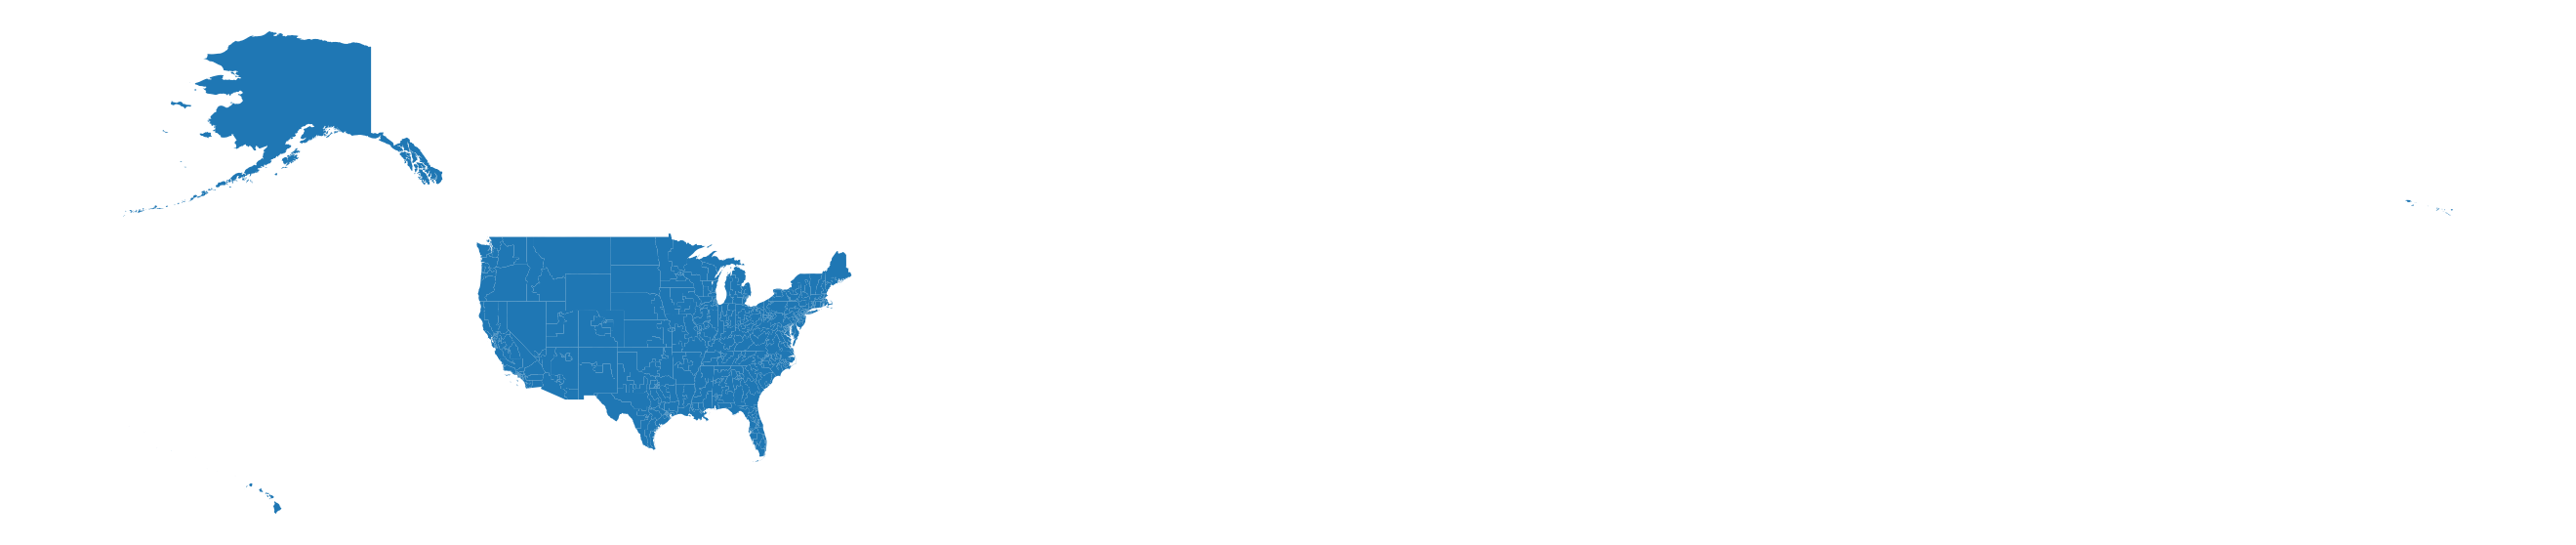

In [199]:
fig, ax = plt.subplots(figsize = (50, 10))
map_districts.plot(ax = ax)

ax.axis('off');

In [ ]:
voting_turnout.to_csv("../data/voter_turnout.csv")
voting_age.to_csv("../data/voter_age.csv")
voting_ed.to_csv("../data/voter_edu.csv")
voting_sex_poverty.to_csv("../data/voter_sex_poverty.csv")
voting_race.to_csv("../data/voter_race.csv")

In [ ]:
clean_districts.to_csv("../data/clean_districts.csv")

In [ ]:
clean_districts.to_file("../data/cleaner_districts.geojson", driver="GeoJSON")

In [200]:
map_districts.to_file("../data/map_districts.geojson", driver="GeoJSON")